In [1]:
"""
@Description :   
@Author      :   Xubo Luo 
@Time        :   2024/04/27 19:56:31
"""

import matplotlib.pyplot as plt
import torch
import warnings
import tqdm
import time
import os
import argparse
# from utils.DataLoader import get_dataloader
from utils.RAFDB import get_dataloader
from models.resnet.resnet_50 import ResNet50
from models.resnet.resnet_101 import ResNet101
from models.resnet.resnet_152 import ResNet152
from models.efficientnet.model import EfficientNet
from models.vit.model import ViT
warnings.filterwarnings("ignore")

/home/xubo/anaconda3/envs/fer/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# import models

resnet50 = ResNet50
resnet101 = ResNet101
resnet152 = ResNet152
efficientnet0 = EfficientNet.from_pretrained('efficientnet-b0', num_classes=7)
efficientnet4 = EfficientNet.from_pretrained('efficientnet-b4', num_classes=7)
efficientnet7 = EfficientNet.from_pretrained('efficientnet-b7', num_classes=7)
vit = ViT(
    image_size = 100,
    patch_size = 10,
    num_classes = 7,
    dim = 1024,
    depth = 3,
    heads = 16,
    mlp_dim = 2048,
    dropout = 0.1,
    emb_dropout = 0.1
)

# load weiqhts
resnet50.load_state_dict(torch.load('checkpoints/resnet50/2024_4_24_19_48/resnet50_100.pth'))
resnet101.load_state_dict(torch.load('checkpoints/resnet101/2024_4_24_20_43/resnet101_100.pth'))
resnet152.load_state_dict(torch.load('checkpoints/resnet152/2024_4_24_22_28/resnet152_100.pth'))
efficientnet0.load_state_dict(torch.load('checkpoints/efficientnet0/2024_4_24_9_9/efficientnet_100.pth'))
efficientnet4.load_state_dict(torch.load('checkpoints/efficientnet4/2024_4_24_10_2/efficientnet4_100.pth'))
efficientnet7.load_state_dict(torch.load('checkpoints/efficientnet7/2024_4_24_13_4/efficientnet7_100.pth'))
vit.load_state_dict(torch.load('checkpoints/vit/2024_4_25_19_10/vit_160.pth'))

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b4
Loaded pretrained weights for efficientnet-b7


<All keys matched successfully>

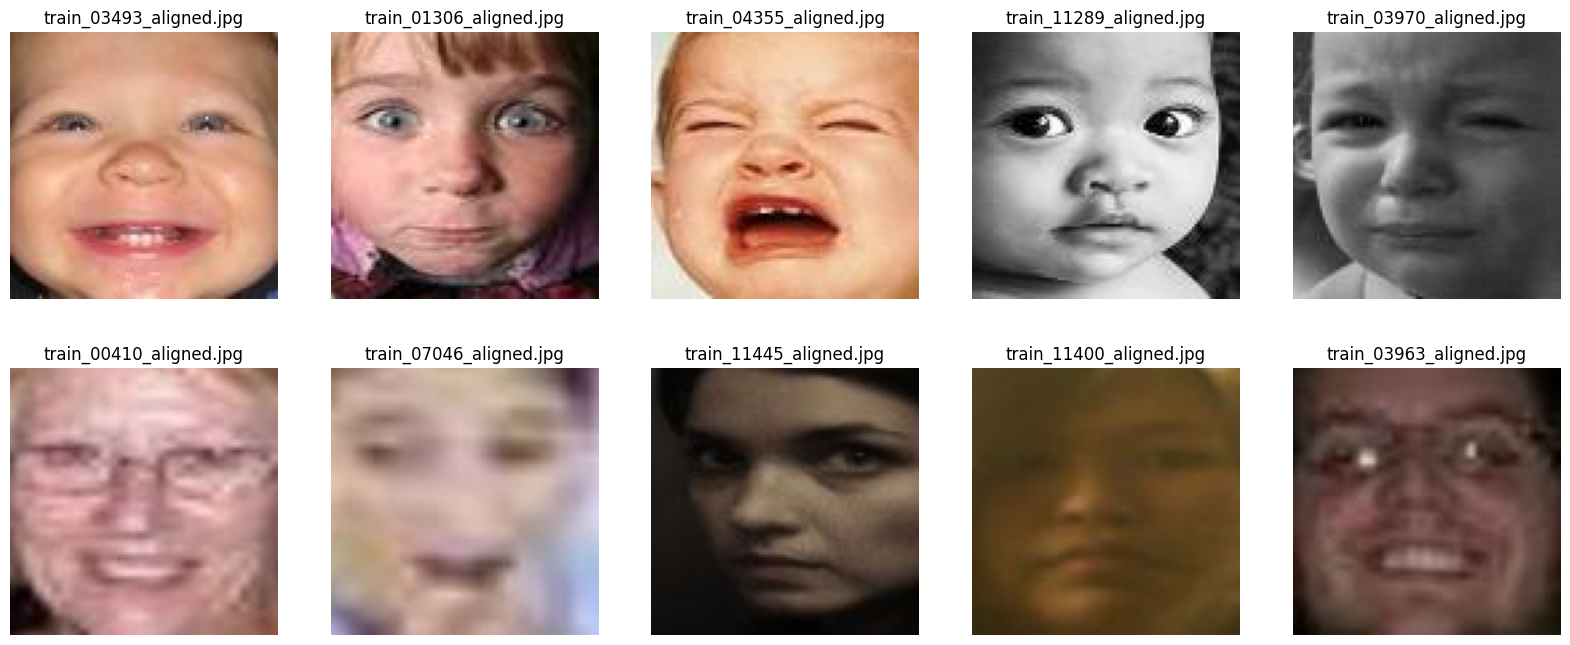

In [4]:
# load data
test_image_path = 'data/RAF-DB/DATASET/images'
test_image_names = os.listdir(test_image_path)

# show some samples
sample = [test_image_names[i] for i in range(10)]
fig, ax = plt.subplots(2, 5, figsize=(20, 8))
for i in range(10):
    img = plt.imread(os.path.join(test_image_path, sample[i]))
    ax[i//5, i%5].imshow(img)
    ax[i//5, i%5].set_title(sample[i])
    ax[i//5, i%5].axis('off')
plt.show()

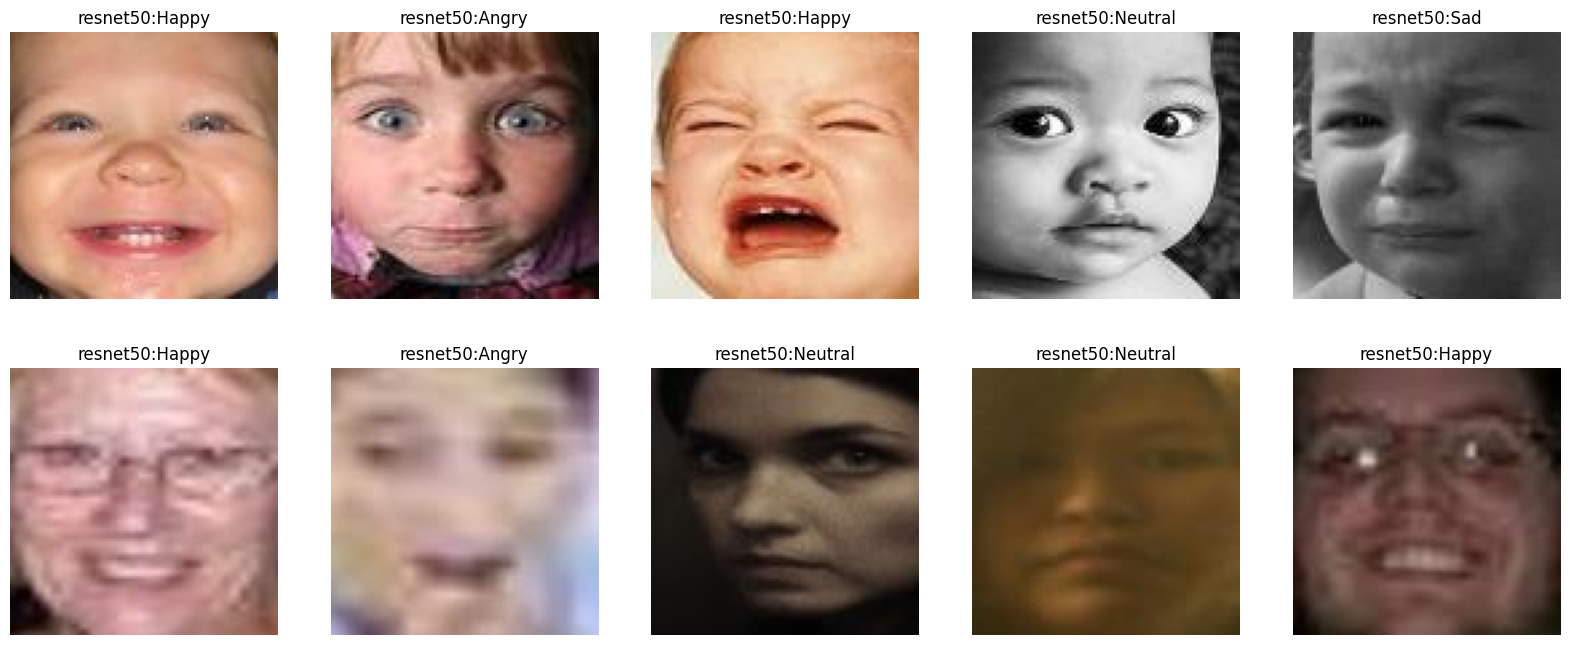

In [6]:
# test
## step 1: choose a model
## step 2: choose an image
## step 3: predict
## step 4: show the result

emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

fig, ax = plt.subplots(2, 5, figsize=(20, 8))
for i in range(10):
    img = plt.imread(os.path.join(test_image_path, sample[i]))
    img = torch.tensor(img).permute(2, 0, 1).unsqueeze(0).float() / 255
    resnet50.eval()
    with torch.no_grad():
        resnet50_pred = resnet50(img)
    emotion = emotions[resnet50_pred.argmax(1).item()]
    ax[i//5, i%5].imshow(img.squeeze().permute(1, 2, 0))
    ax[i//5, i%5].set_title('resnet50:' + emotion)
    ax[i//5, i%5].axis('off')

plt.show()  

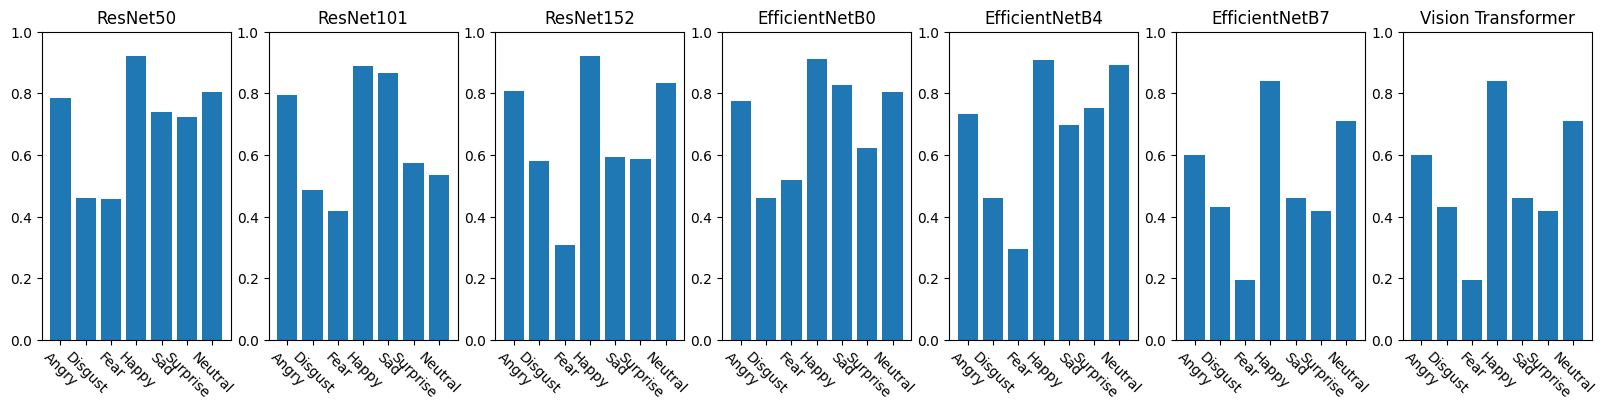

In [16]:
'''
| Model | Angry | Disgust | Fear | Happy | Sad | Surprise | Neutral |
| ---------------- | ------ | ------- | ---- | ----- | --- | ------- | ------- |
| ResNet50 | 0.7842 | 0.4595 | 0.4562 | 0.9215 | 0.7385 | 0.7222 | 0.8059 |
| ResNet101 | 0.7964 | 0.4865 | 0.4188 | 0.8903 | 0.8661 | 0.5741 | 0.5338 |
| ResNet152 | 0.8085 | 0.5811 | 0.3063 | 0.9207 | 0.5921 | 0.5864 | 0.8338 |
| EfficientNetB0 | 0.7751 | 0.4595 | 0.5188 | 0.9114 | 0.8285 | 0.6235 | 0.8044 |
| EfficientNetB4 | 0.7325 | 0.4595 | 0.2938 | 0.9097 | 0.6987 | 0.7531 | 0.8926 |
| EfficientNetB7 | 0.5988 | 0.4324 | 0.1938 | 0.8397 | 0.4603 | 0.4198 | 0.7118 |
| Vision Transformer | 0.5988 | 0.4324 | 0.1938 | 0.8397 | 0.4603 | 0.4198 | 0.7118 |
'''

# visualize the results
results = {
    'ResNet50': [0.7842, 0.4595, 0.4562, 0.9215, 0.7385, 0.7222, 0.8059],
    'ResNet101': [0.7964, 0.4865, 0.4188, 0.8903, 0.8661, 0.5741, 0.5338],
    'ResNet152': [0.8085, 0.5811, 0.3063, 0.9207, 0.5921, 0.5864, 0.8338],
    'EfficientNetB0': [0.7751, 0.4595, 0.5188, 0.9114, 0.8285, 0.6235, 0.8044],
    'EfficientNetB4': [0.7325, 0.4595, 0.2938, 0.9097, 0.6987, 0.7531, 0.8926],
    'EfficientNetB7': [0.5988, 0.4324, 0.1938, 0.8397, 0.4603, 0.4198, 0.7118],
    'Vision Transformer': [0.5988, 0.4324, 0.1938, 0.8397, 0.4603, 0.4198, 0.7118]
}

fig, ax = plt.subplots(1, 7, figsize=(20, 4))
for i, model in enumerate(results.keys()):
    ax[i].bar(emotions, results[model])
    ax[i].set_title(model)
    ax[i].set_ylim(0, 1)
    ax[i].xaxis.set_tick_params(rotation=-45)

plt.show()
